In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [8]:
# Load and Preprocess the data

# Load the data
file_path = "D:/Personal Projects/Autoregressive sunspot modeling/Sunspots.csv"
sunspot_data = pd.read_csv(file_path)

# Convert 'Date' to datetime and set as index
sunspot_data['Date'] = pd.to_datetime(sunspot_data['Date'])
sunspot_data.set_index('Date', inplace=True)

# Rename the column for convenience
sunspot_data.rename(columns={'Monthly Mean Total Sunspot Number': 'SunspotNumber'}, inplace=True)


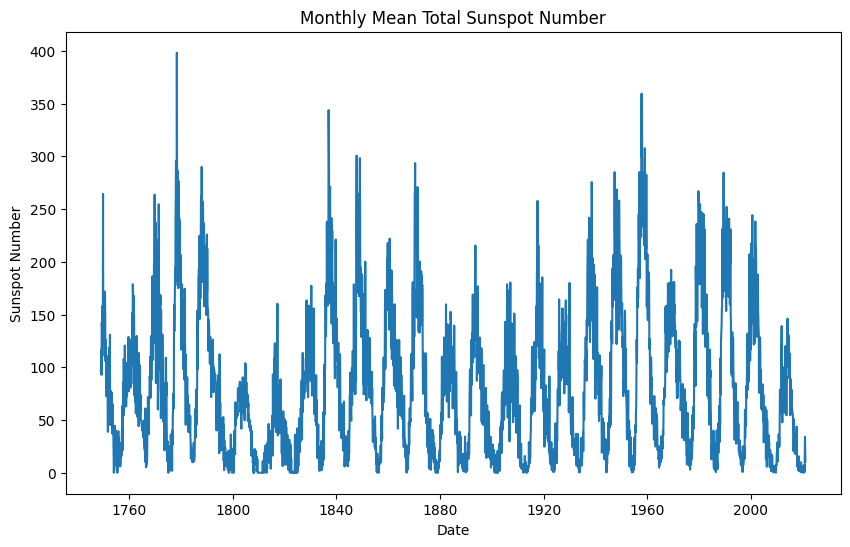

In [10]:
# Intial Data Visualization

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(sunspot_data['SunspotNumber'])
plt.title('Monthly Mean Total Sunspot Number')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.show()

In [14]:
# Check the Stationarity of the Data

# Perform ADF test
result = adfuller(sunspot_data['SunspotNumber'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -10.497051662546152
p-value: 1.1085524921955702e-18


In [16]:
# Since the p-value is very low, the series is stationary, so we use the original data
stationary_data = sunspot_data['SunspotNumber']

In [35]:
# Evaluate different lag values
aic_values = []
bic_values = []
lag_values = range(1, 21)

for lag in lag_values:
    model = AutoReg(stationary_data, lags=lag).fit()
    aic_values.append(model.aic)
    bic_values.append(model.bic)

C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCac

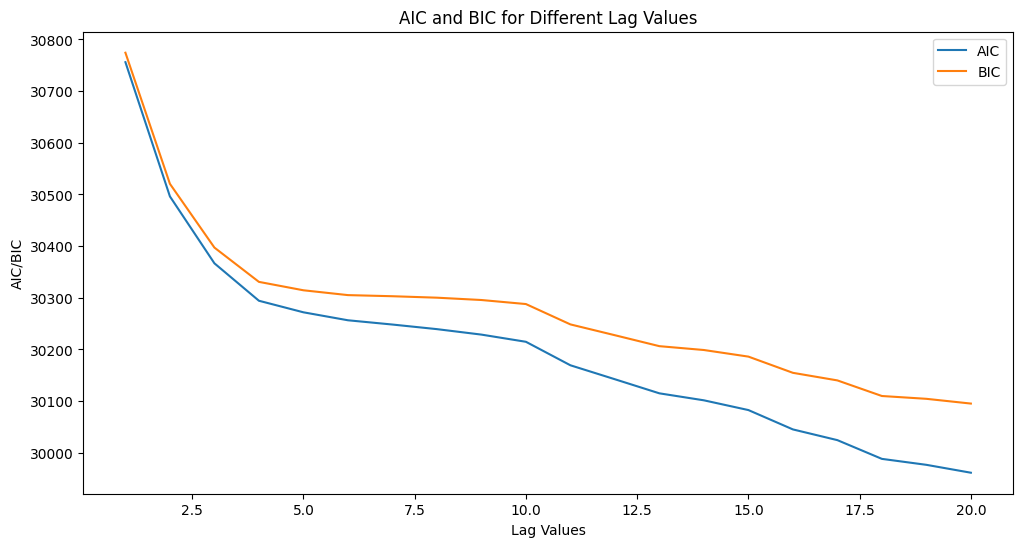

In [36]:
# Plot AIC and BIC
plt.figure(figsize=(12, 6))
plt.plot(lag_values, aic_values, label='AIC')
plt.plot(lag_values, bic_values, label='BIC')
plt.xlabel('Lag Values')
plt.ylabel('AIC/BIC')
plt.title('AIC and BIC for Different Lag Values')
plt.legend()
plt.show()

In [37]:
# Select the optimal lag value based on the lowest AIC/BIC
optimal_lag_aic = lag_values[aic_values.index(min(aic_values))]
optimal_lag_bic = lag_values[bic_values.index(min(bic_values))]
print(f'Optimal Lag Value based on AIC: {optimal_lag_aic}')
print(f'Optimal Lag Value based on BIC: {optimal_lag_bic}')

Optimal Lag Value based on AIC: 20
Optimal Lag Value based on BIC: 20


In [38]:
# Fit the model with the optimal lag value based on AIC
model_aic = AutoReg(stationary_data, lags=optimal_lag_aic).fit()
print("Model Summary based on AIC:")
print(model_aic.summary())

# Fit the model with the optimal lag value based on BIC
model_bic = AutoReg(stationary_data, lags=optimal_lag_bic).fit()
print("Model Summary based on BIC:")
print(model_bic.summary())

C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Model Summary based on AIC:
                            AutoReg Model Results                             
Dep. Variable:          SunspotNumber   No. Observations:                 3265
Model:                    AutoReg(20)   Log Likelihood              -14958.641
Method:               Conditional MLE   S.D. of innovations             24.308
Date:                Wed, 24 Jul 2024   AIC                          29961.282
Time:                        10:36:24   BIC                          30095.149
Sample:                    09-30-1750   HQIC                         30009.242
                         - 01-31-2021                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.6079      0.733      7.648      0.000       4.171       7.045
SunspotNumber.L1      0.5391      0.018     30.750      0.000       0.505       0.

In [40]:
# Select the model with the optimal lag value (either AIC or BIC)
if model_aic.aic < model_bic.aic:
    model = model_aic
    print(f"Selected model based on AIC with lag {optimal_lag_aic}")
else:
    model = model_bic
    print(f"Selected model based on BIC with lag {optimal_lag_bic}")

Selected model based on BIC with lag 20


In [41]:
# Generate forecasts
n_forecast = 60  # Number of steps to forecast
forecast = model.predict(start=len(stationary_data), end=len(stationary_data) + n_forecast - 1)

C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


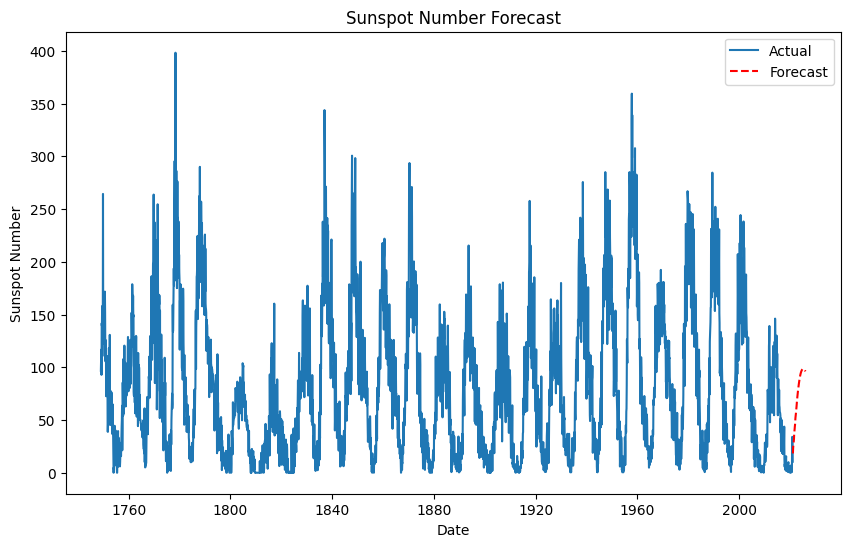

In [42]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(stationary_data, label='Actual')
plt.plot(forecast, color='red', linestyle='--', label='Forecast')
plt.title('Sunspot Number Forecast')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

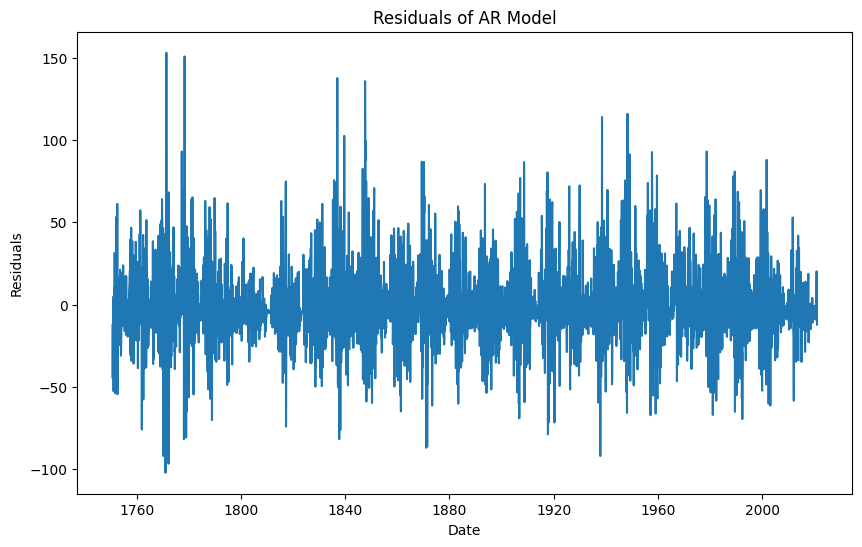

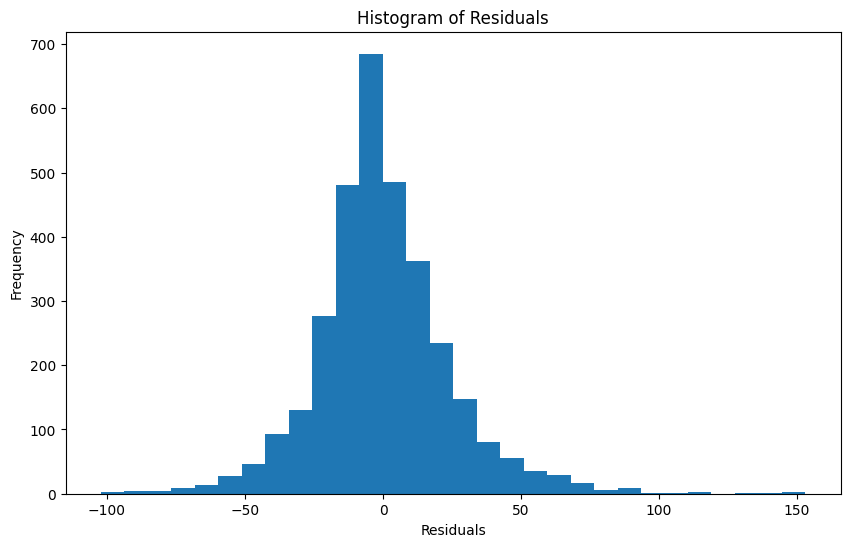

     lb_stat  lb_pvalue
10  2.815246   0.985444


In [43]:
# Model Evaluation

# Residual analysis
residuals = model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of AR Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)